In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_features = 2
n_clusters = 10

X, y = make_blobs(n_samples=250, n_features=n_features, random_state=0, centers=n_clusters)
X.shape, y.shape

((250, 2), (250,))

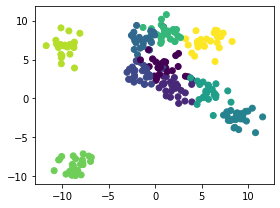

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
ax.scatter(X[:, 0], X[:, 1], c=y);
fig.tight_layout()
fig.savefig("images/Toy-Clusters.png")

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, init="random").fit(X)

KMeans
Homogeneity:  0.8835190450967494
Completeness: 0.8841393133548028
V-Measure:    0.883829070400247
Inertia:      432.4183560129962


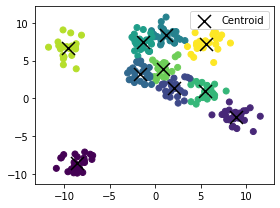

In [6]:
from util import plot_cluster

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_cluster(kmeans, X, y, [ax])
fig.tight_layout()
fig.savefig("images/Toy-KMeans-Clusters.png")

In [7]:
from algorithms import SimpleESClustering
from objectives import KMeansObjective

ses = SimpleESClustering(objective=KMeansObjective(), n_iter=100, n_pop=20, n_features=n_features * n_clusters, random_state=0, sigma=0.2)
ses.fit(X);

100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


SimpleESClustering
Homogeneity:  0.8416099025950361
Completeness: 0.8956817626910398
V-Measure:    0.8678043602199949
Inertia:      539.6442233078646


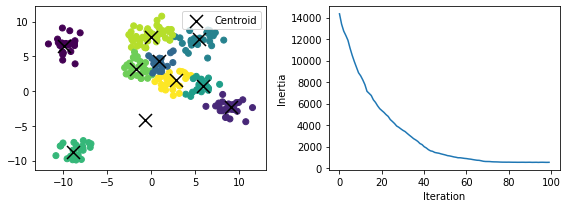

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_cluster(ses, X, y, axes)
fig.tight_layout()
fig.savefig("images/Toy-SimpleESClustering-Clusters.png")

In [9]:
from algorithms import GeneticESClustering

ges = GeneticESClustering(objective=KMeansObjective(), n_iter=150, n_pop=20, n_features=n_features * n_clusters, random_state=0, sigma=0.2)
ges.fit(X);

100%|██████████| 150/150 [02:09<00:00,  1.16it/s]


GeneticESClustering
Homogeneity:  0.8575659415992961
Completeness: 0.8634940225393775
V-Measure:    0.8605197726215649
Inertia:      506.09878104675585


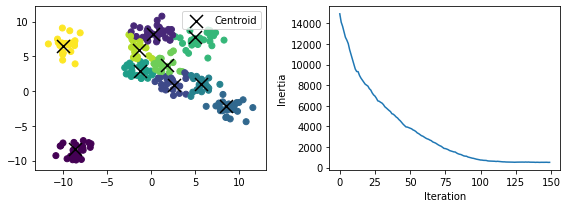

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_cluster(ges, X, y, axes)
fig.tight_layout()
fig.savefig("images/Toy-GeneticESClustering-Clusters.png")

In [11]:
from algorithms import NaturalESClustering

nes = NaturalESClustering(objective=KMeansObjective(), n_iter=100, n_pop=20, n_features=n_features * n_clusters, random_state=0, sigma=0.1)
nes.fit(X);

100%|██████████| 100/100 [01:01<00:00,  1.61it/s]


NaturalESClustering
Homogeneity:  0.9036025383077291
Completeness: 0.9044185424158774
V-Measure:    0.9040103562205032
Inertia:      448.0409957959125


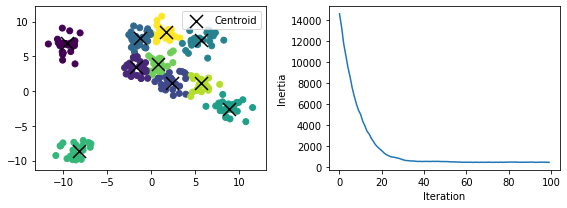

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_cluster(nes, X, y, axes)
fig.tight_layout()
fig.savefig("images/Toy-NaturalESClustering-Clusters.png")

In [19]:
from algorithms import DifferentialEvolutionClustering

dev = DifferentialEvolutionClustering(objective=KMeansObjective(), n_iter=150, n_features=n_features * n_clusters, random_state=0, bounds=(-10, 10))
dev.fit(X);

100%|██████████| 150/150 [00:49<00:00,  3.03it/s]


DifferentialEvolutionClustering
Homogeneity:  0.8966047299680898
Completeness: 0.8972815359909443
V-Measure:    0.8969430053052043
Inertia:      431.1893658908571


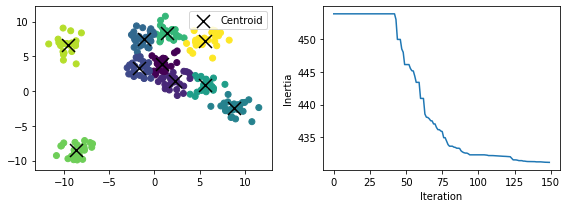

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_cluster(dev, X, y, axes)
fig.tight_layout()
fig.savefig("images/Toy-DifferentialEvolutionClustering-Clusters.png")